# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada dataset Wholesale Customers menggunakan KNN (K-Nearest Neighbor)

<b>Anggota kelompok:  </b>
1. Claintont Suyanto - 1301220364
2. Viorano Arcgis Octara - 1301223431
3. Ajax Falak Santoso - 1301223125 

#### **Pendahuluan**

Pada tugas besar mata kuliah Pengantar Kecerdasan Buatan, digunakan dataset "Wholesale customers" dari Repositori UCI Machine Learning. Dataset memiliki informasi pembelian grosir dengan variabel: Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents Paper, Delicassen. Tujuan analisis ini adalah mengklasifikasikan pelanggan ke dalam tiga kategori wilayah (Region) berdasarkan jumlah pembelian produk-produk tersebut.

Pengolahan data menggunakan library pandas, numpy, matplotlib.pyplot, seaborn, warnings. Library pandas digunakan untuk membaca dan memanipulasi dataset. Library numpy biasanya digunakan untuk menghitung operasi matematika pada array. Library matplotlib.pyplot digunakan untuk membuat grafik garis, scatter plot, histogram, dan banyak lainnya dari dataset. Library seaborn dibangun di atas Matplotlib, menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang informatif. Library warnings digunakan untuk mengabaikan notifikasi warning atau peringatan.

Alur dari pengolahan data adalah pertama program akan membaca file dataset. Kemudian, Dataset akan ditampilkan isinya beserta dengan ukurannya menggunakan display(data) dan akan menampilkan statistik(count, mean, standar deviasi (std), min, Q1(25%), Q2(50%), Q3(75%), max dari data fitur menggunakan data.describe().


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(filename)
warnings.filterwarnings('ignore')

# Menampilkan dataset
display(data)

# Menampilkan statistik dari dataset
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Setelah itu, akan diperlihatkan sebaran data menggunakan box plot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data, ukuran tendensi sentral, dan ukuran penyebaran data pengamatan.


<Axes: >

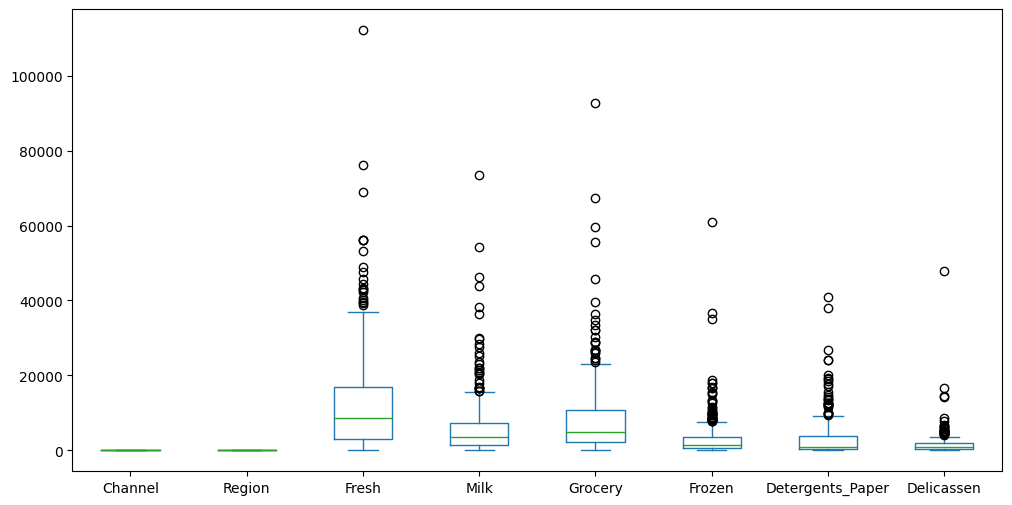

In [2]:
# Menampilkan box plot
data.plot(kind='box', figsize=(12, 6))

Kemudian akan dilakukan penghapusan outlier untuk merapihkan data. Dengan cara, menghapus data yang melebihi nilai upper extreme dan lower extreme disetiap varibel. Setelah itu, akan ditampilkan kembali boxplot dari data yang telah diubah untuk melihat sebaran data yang telah dihapus.

<Axes: >

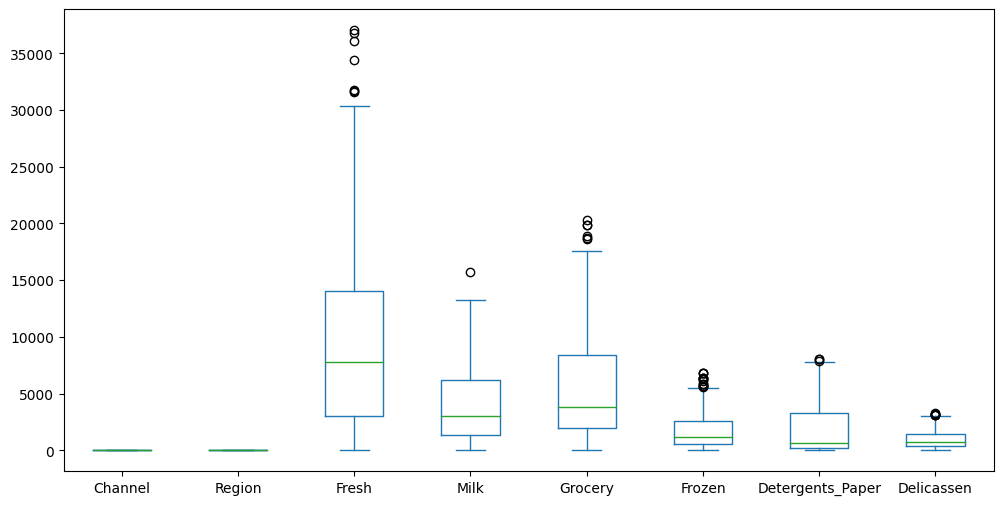

In [3]:
# Menghapus outlier
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    bottom_boundary = Q1 - 1.5 * IQR
    top_boundary = Q3 + 1.5 * IQR

    data = data.loc[(data[col] <= top_boundary) & (data[col] >= bottom_boundary)]

# Menampilkan box plot setelah menghapus outlier
data.plot(kind='box', figsize=(12, 6))

Setelah itu, nilai korelasi antar variabel akan ditampilkan menggunakan correlogram heatmap. Heatmap digunakan untuk mengidentifikasi korelasi pada kumpulan data. Heatmap ini menggunakan warna yang berbeda untuk menunjukkan kekuatan dan arah korelasi antara dua variabel dalam data.

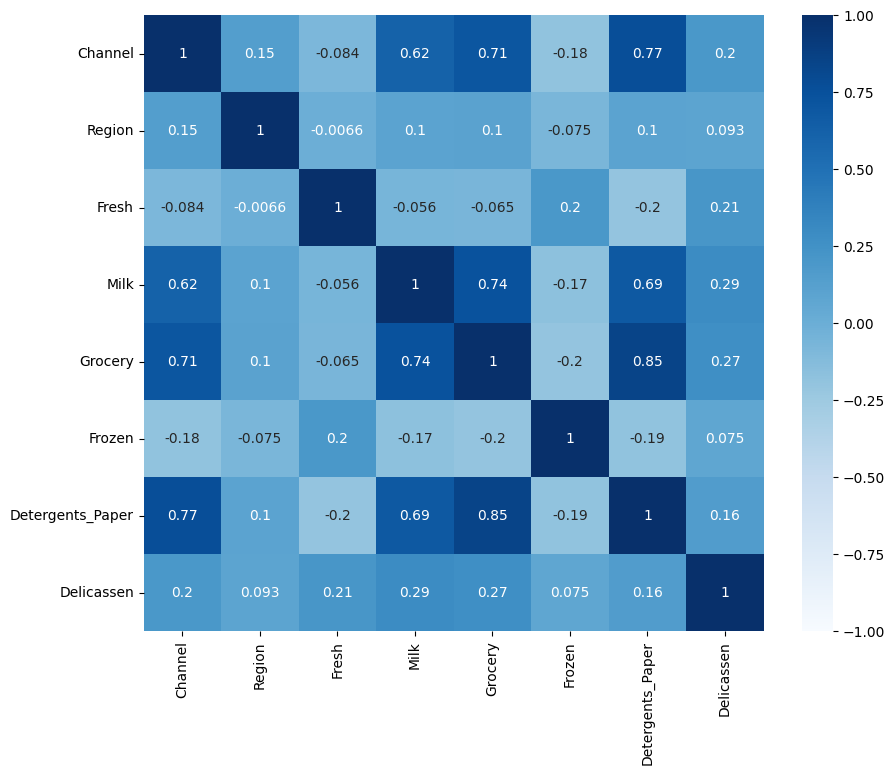

In [4]:
# Menampilkan heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

Dari hasil heatmap, data tersebut akan dibagi menjadi data fitur dan data target. Data fitur dipilih yang memiliki nilai korelasi lumayan tinggi dengan data target. Data target sudah ditentukan oleh dataset. Setelah itu, akan dilakukan normalisasi data fitur menggunakan RobustScaler dari library  sklearn.preprocessing. Robust scaling pada dasarnya mirip dengan Min-Max scaling, tetapi formula utama yang digunakan dalam mengestimasi atau menghasilkan nilai baru adalah median rentang interkuartil, sehingga hasil scaling-nya menjadi kuat terhadap pencilan. Kemudian, Dataset akan dibagi menggunakan train_test_split  dari sklearn.model_selection. Data dibagi menjadi dua set yaitu, train set(80% dari data) dan test set(20% dari data).

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Memiisahkan fitur dan target
data = data.drop('Channel', axis=1)
data = data.drop('Fresh', axis=1)
data = data.drop('Frozen', axis=1)
data = data.drop('Delicassen', axis=1)
X = data.drop('Region', axis=1)
y = data['Region']

# Normalisasi nilai fitur
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65, shuffle=True)

# Menampilkan dataset
display(data)

,Region,Milk,Grocery,Detergents_Paper
0,3,9656,7561,2674
1,3,9810,9568,3293
3,3,1196,4221,507
5,3,8259,5126,1795
6,3,3199,6975,3140
...,...,...,...,...
432,3,1162,4754,1328
433,3,3218,1493,356
434,3,3922,7994,2371
438,3,1981,2232,168


#### **Metode yang Digunakan**

Metode yang digunakan adalah KNN (K-Nearest Neighbors) karena dataset yang diambil merupakan dataset klasifikasi. KNN sendiri merupakan salah satu metode klasifikasi yang sudah banyak digunakan. Metode KNN digunakan karena lebih mudah dipahami dan diimplementasikan. selain itu, metode KNN dapat bekerja dengan baik untuk data yang memiliki lebih dari dua kelas. Tujuan dari algoritma ini adalah mengidentifikasi tetangga terdekat dari titik kueri yang diberikan, sehingga dapat menetapkan label kelas ke titik tersebut. Terdapat 2 poin penting yang perlu diperhatikan yaitu, menentukan matrik jarak dan mendefinisikan nilai k. Untuk menemukan titik terdekat, metode yang dapat digunakan adalah euclidean distance. Euclidean distance adalah perhitungan jarak dari dua buah titik dalam euclidean space untuk mempelajari hubungan antara sudut dan jarak. Rumus dari euclidean distance adalah [√Σ((x₂ - x₁)² + (y₂ - y₁)²)]. Pada subprogram euclidean distance, dilakukan perulangan untuk perhitungan sigma. Setelah itu terdapat [distance += pow((a[x] - b[x]), 2)] untuk menghitung total jarak antar kedia titik. Setelah perulangan berakhir maka akan total distance akan diakar dan dikembalikan.

Pada subprogram knn_predict parameter yang dibutuhkan adalah data train fitur (X_train), data train target (y_train), data test fitur (X_test), dan Jumlah tetangga terdekat yang akan dipertimbangkan dalam prediksi (K).
Terdapat nested loop (perulangan bersarang) yang akan digunakan pada algoritma ini. Perulangan luar berfungsi untuk melakukan iterasi melalui setiap titik data dalam dataset uji X_test. Untuk setiap test_point dalam X_test akan diinisialisasi list kosong distances. Perulangan dalam akan melalui setiap train_point dalam X_train. Pada perulangan ini akan dihitung jarak menggunakan subprogram euclidean_distance. Jarak yang telah didapat tersebut akan diurutkan secara ascending (menaik) menggunakan sort. Setelah itu, melakukan pemilihan K tetangga terdekat. Dari hasil pemilihan K tetangga terdekat akan dipilih data mayoritas dengan cara membuat list label dari K tetangga terdekat. Lalu, akan ditentukan kelas mayoritas dari list tersebut dengan cara menghitung frekuensi setiap kelas dalam list dan memilih yang terbanyak. Hasil prediksi tersebut akan disimpan pada list y_pred.

In [6]:
# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(a, b):
    distance = 0
    for x in range(len(a)):
        distance += pow((a[x] - b[x]), 2)
    return np.sqrt(distance)

# Fungsi untuk melakukan prediksi KNN
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = []
        # Menghitung jarak
        for i, train_point in enumerate(X_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, y_train.iloc[i]))
        # Urutkan berdasarkan jarak
        distances.sort(key=lambda x: x[0])
        # Ambil k tetangga terdekat
        neighbors = distances[:k]
        # Ambil kelas mayoritas dari k tetangga terdekat
        classes = [neighbor[1] for neighbor in neighbors]
        prediction = max(set(classes), key=classes.count)
        y_pred.append(prediction)
    return np.array(y_pred)

 K-fold cross-validation digunakan untuk menentukan nilai K terbaik. Pada metode ini, train set akan dibagi menjadi 5 fold setiap fold digunakan secara bergantian sebagai data validasi sementara sisanya sebagai data training menggunakan library Kfold. Library Kfold berguna untuk membagi data train menjadi k lipatan berurutan. Pada subprogram Kfold_cross_validation akan dilakukan testing nilai K untuk KNN dari 1 hingga 10 untuk mendapatkan nilai K terbaik. Nested loop (Perulangan Bersarang) akan digunakan pada subprogram ini. Perulangan luar untuk melakukan testing nilai K dari 1 hingga 10. Perulang dalam untuk melakukan model training setiap fold pada K yang ditentukan pada perulangan luar dan mengukur nilai akurasi dan f1 score yang dapat digunakan untuk mendapatkan K terbaik untuk KNN. Perhitungan akurasi dan f1 score dilakukan menggunakan bantuan library accuracy_score dan f1_score pada sklearn.metrics. Setelah nested loop (Perulangan bersarang), Nilai akurasi yang didapat pada perulangan dalam masih terbagi pada 5 fold maka dari itu diperlukan perhitungan rata rata (mean) untuk mendapatkan nilai akurasi dari penggunaan setiap K. Terdapat perbandingan nilai rata rata akurasi untuk mencari nilai akurasi tertinggi dan mencari nilai K terbaik untuk KNN. Setelah itu, nilai K terbaik, akurasi terbagus, nilai per fold dari K terbaik, dan semua nilai rata rata akurasi akan dikeluarkan dari subprogram tersebut untuk ditampilkan nilainya.

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

# Mencari k terbaik menggunakan K-fold cross-validation
def kfold_cross_validation(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=65)
    k_values = range(1, 11)
    best_k = 1
    best_score = 0
    all_scores = {'accuracy': [], 'f1_score': []}

    for k in k_values:
        fold_akurasi = []
        fold_f1_scores = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Melakukan prediksi pada set validation
            y_val_pred = knn_predict(X_train, y_train, X_val, k)
            fold_akurasi.append(accuracy_score(y_val, y_val_pred))
            fold_f1_scores.append(f1_score(y_val, y_val_pred, average='weighted'))

        avg_akurasi = np.mean(fold_akurasi)
        avg_f1_score = np.mean(fold_f1_scores)
        all_scores['accuracy'].append(avg_akurasi)
        all_scores['f1_score'].append(avg_f1_score)

        print(f"k = {k} \t| Avg Accuracy = {avg_akurasi} \t| Avg F1 Score = {avg_f1_score}")
        # Mencari k terbaik
        if avg_akurasi > best_score:
            best_score = avg_akurasi
            best_k = k

    return best_k, best_score, all_scores

Selanjutnya, subprogram kfold_cross_validation akan dipanggil untuk melakukan validasi data. data yang digunakan adalah data train karena tujuan dari cross-validation adalah untuk menilai performa model secara internal pada set pelatihan sebelum akhirnya menguji performa model pada set pengujian (test set) yang sebenarnya. Setelah itu, akan ditampilkan nilai akurasi dan nilai f1 score dari setiap K untuk menunjukan bahwa nilai K yang dipilih menjadi K terbaik tidak dipilih secara acak.

In [8]:
best_k, best_score, all_scores = kfold_cross_validation(X_train, y_train)
print(f"\nBest k: {best_k:.1f} with average validation accuracy: {best_score:1f}")

k = 1 	| Avg Accuracy = 0.5357647058823529 	| Avg F1 Score = 0.5354104001755751
k = 2 	| Avg Accuracy = 0.40972549019607846 	| Avg F1 Score = 0.45367741271890505
k = 3 	| Avg Accuracy = 0.5829019607843138 	| Avg F1 Score = 0.5638426799757613
k = 4 	| Avg Accuracy = 0.5672941176470588 	| Avg F1 Score = 0.5481833733847475
k = 5 	| Avg Accuracy = 0.6144313725490196 	| Avg F1 Score = 0.5707664828321829
k = 6 	| Avg Accuracy = 0.6145882352941175 	| Avg F1 Score = 0.5602949901009541
k = 7 	| Avg Accuracy = 0.6774117647058823 	| Avg F1 Score = 0.5927263911767657
k = 8 	| Avg Accuracy = 0.6813333333333335 	| Avg F1 Score = 0.5941431121435422
k = 9 	| Avg Accuracy = 0.6734117647058824 	| Avg F1 Score = 0.5793599982628711
k = 10 	| Avg Accuracy = 0.6774901960784312 	| Avg F1 Score = 0.5765573380867499

Best k: 8.0 with average validation accuracy: 0.681333


Hasil yang telah didapat akan ditampilkan grafik untuk mempermudah dalam memahami. Hasil tersebut akan ditampilkan dengan bantuan library matplotlib.pyplot yang dipersingkat menjadi plt. Sumbu x pada grafik akan menampilkan nilai K dan sumbu Y pada grafik akan menampilkan nilai akurasi dan f1 score. Untuk mempermudah perbandingan digunakan pewarnaan pada garis. Warna biru untuk akurasi dan warna hijau untuk f1 score.

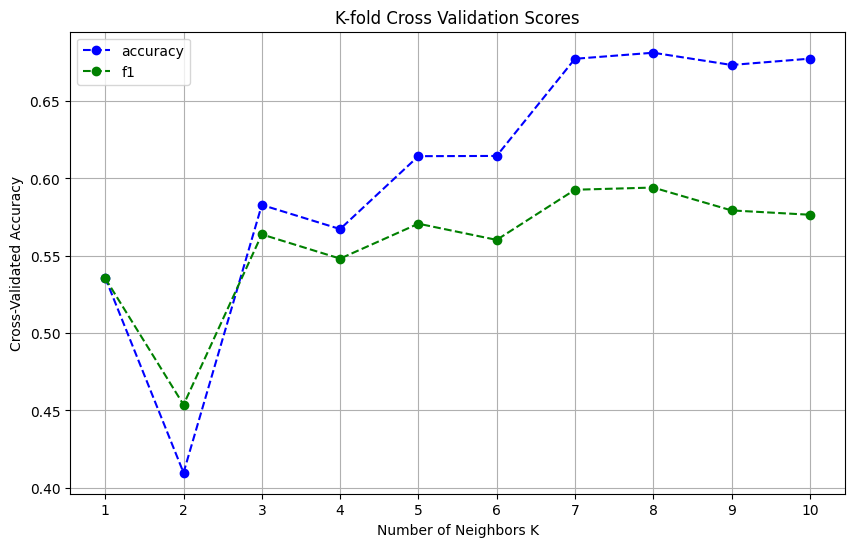

In [9]:
# Plot K-fold cross-validation results

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), all_scores['accuracy'], marker='o', linestyle='--', color='b')
plt.plot(range(1, 11), all_scores['f1_score'], marker='o', linestyle='--', color='g')
plt.title('K-fold Cross Validation Scores')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(['accuracy', 'f1'])
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Setelah mendapatkan nilai K terbaik menggunakan kfold cross validation, akan dilakukan pengujian pada data test menggunakan subprogram knn_predict yang telah dibuat sebelumnya. Parameter yang dibutuhkan pada subprogram ini adalah data fitur train (X_train), data target train (Y_train), data fitur test (X_test), dan nilai K terbaik dari kfold cross validation. Hasil dari subprogram tersebut akan disimpan di sebuah variable (t_test_pred) untuk dihitung nilai akurasi, f1 score, dan precisionnya menggunakan library accuracy_score, f1_score, precision_score dari sklearn.metrics. Precision mengukur proporsi prediksi positif yang benar terhadap semua prediksi positif. Akurasi mengukur proporsi prediksi yang benar terhadap keseluruhan prediksi. F1 Score adalah harmonic mean dari precision dan recall. F1 Score memberikan gambaran yang lebih seimbang antara precision dan recall. Ini adalah metrik yang paling intuitif, namun tidak selalu ideal untuk dataset yang tidak seimbang. Tidak hanya itu, confusion matrix dan classification report juga akan ditampilkan menggunakan library classification_report, confusion_matrix dari sklearn.metics.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

# Melakukan prediksi pada set pengujian dengan k terbaik
y_test_pred = knn_predict(X_train, y_train, X_test, best_k)

# Evaluasi performa model
print(f"Accuracy: {accuracy_score(y_test, y_test_pred) * 100:.1f}% atau {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted') * 100:.1f}% atau {precision_score(y_test, y_test_pred, average='weighted')}")
print(f"f1_score: {f1_score(y_test, y_test_pred, average='weighted') * 100:.1f} % atau {f1_score(y_test, y_test_pred, average='weighted')}")
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report")
print(classification_report(y_test, y_test_pred))

Accuracy: 82.8% atau 0.828125
Precision: 76.6% atau 0.7661372950819672
f1_score: 78.6 % atau 0.7864809782608696

Confusion Matrix
[[ 1  0  8]
 [ 0  0  1]
 [ 2  0 52]]

Classification Report
              precision    recall  f1-score   support

           1       0.33      0.11      0.17         9
           2       0.00      0.00      0.00         1
           3       0.85      0.96      0.90        54

    accuracy                           0.83        64
   macro avg       0.40      0.36      0.36        64
weighted avg       0.77      0.83      0.79        64



### **Hasil dan Analisis**


#### Pre Processing
Pada dataset ini, berisi 8 variable ("Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen") dengan 440 data per variablenya. Namun, setelah ditampilkan penyebaran data menggunakan boxplot terdapat banyak outlier. Oleh karena itu, diperlukan penghapusan data outlier karena metode KNN lumayan sensitif dengan outlier. Setelah itu, akan ditampilkan nilai korelasi antar variabel dalam rasio -1 hingga 1. Nilai korelasi yang mendekati 0 memiliki arti variable tidak memiliki korelasi satu dengan yang lain.

Variabel "Region" akan dijadikan sebagai data target dengan variabel "Milk", "Grocery", dan "Detegents_Paper". Hal ini dikarenakan pada heatmap ketiga variable tersebut memiliki nilai korelasi tinggi dibanding dengan variabel lain. Selain itu, variable "Channel" tidak dimasukkan kedalam data fitur karena variable tersebut merupakan data bertipe categorical seperti variabel "Region". Data "Region" terdiri dari 3 kategori yaitu Lisbon, Oporto, Other Region. Kategori Lisbon memiliki 77 data, Kategori Oporto hanya memiliki 47 data, dan sisanya 316 data merupakan kategori Other Region. Hal ini menunjukkan bahwa dataset yang dimiliki tidak seimbang atau imbalance.

Data fitur akan di normalisasi menggunakan robustscaler untuk menjaga penyebaran variabel setelah proses scaling yang memiliki tingkat kecondongan yang tinggi dan dapat melakukan penskalaan pada data yang mengandung outlier. Setelah melalui penghapusan outlier, normalisasi, dan pemisahan data fitur target, data hanya tersisa 318 data dengan 4 variabel (1 target dan 3 fitur).


#### Model Training
Pada model training akan dilakukan pencarian nilai K terbaik menggunakan metode K-fold cross-validation. Pada metode ini akan dilakukan perbandingan akurasi dan f1 score. Berikut ini adalah hasil akurasi dan f1 score yang didapat dari K = 1 hingga K = 10:



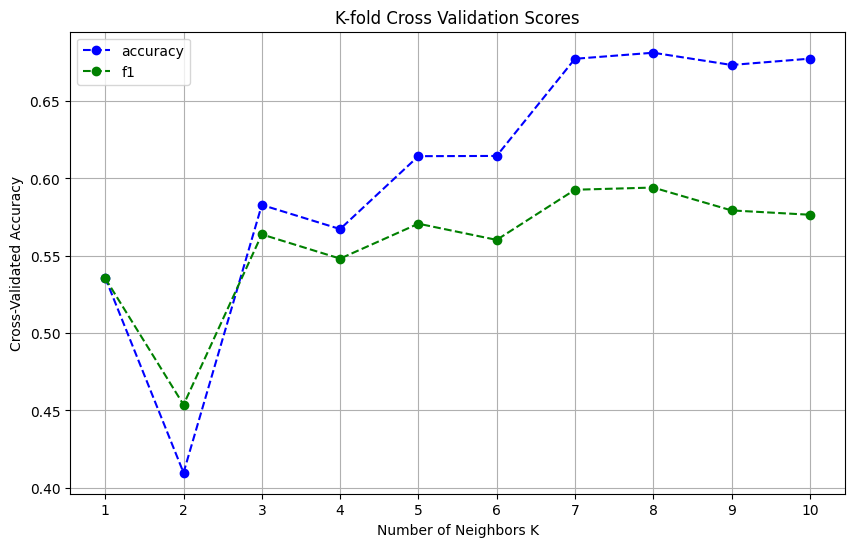

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), all_scores['accuracy'], marker='o', linestyle='--', color='b')
plt.plot(range(1, 11), all_scores['f1_score'], marker='o', linestyle='--', color='g')
plt.title('K-fold Cross Validation Scores')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(['accuracy', 'f1'])
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Pada grafik tersebut, warna biru menandakan nilai dari akurasi dan warna hijau menandakan nilai dari f1 score. Dapat diketahui nilai K = 2 merupakan nilai K yang paling tidak optimal untuk digunakan. Di sisi lain, K dengan nilai 8 memiliki nilai akurasi dan f1 score tertinggi dalam rentang K = 1 hingga K = 10 menandakan K = 8 merupakan K yang palimg optimal untuk digunakan. Berikut ini adalah nilai nilai dari akurasi dan f1 score setiap K:


k = 1 	| Avg Accuracy = 0.5357647058823529 	| Avg F1 Score = 0.5354104001755751

k = 2 	| Avg Accuracy = 0.40972549019607846 	| Avg F1 Score = 0.45367741271890505

k = 3 	| Avg Accuracy = 0.5829019607843138 	| Avg F1 Score = 0.5638426799757613

k = 4 	| Avg Accuracy = 0.5672941176470588 	| Avg F1 Score = 0.5481833733847475

k = 5 	| Avg Accuracy = 0.6144313725490196 	| Avg F1 Score = 0.5707664828321829

k = 6 	| Avg Accuracy = 0.6145882352941175 	| Avg F1 Score = 0.5602949901009541

k = 7 	| Avg Accuracy = 0.6774117647058823 	| Avg F1 Score = 0.5927263911767657

k = 8 	| Avg Accuracy = 0.6813333333333335 	| Avg F1 Score = 0.5941431121435422

k = 9 	| Avg Accuracy = 0.6734117647058824 	| Avg F1 Score = 0.5793599982628711

k = 10 	| Avg Accuracy = 0.6774901960784312 	| Avg F1 Score = 0.5765573380867499



Dari hasil tersebut dapat disimpulkan bahwa K terbaik untuk menguji dataset ini ada K = 8 dengan akurasi = 0,68 dan f1 score = 0,59. Hasil K optimal tersebut akan digunakan pada testing. Berikut ini hasil testing menggunakan K = 8:



In [12]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred) * 100:.1f}% atau {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted') * 100:.1f}% atau {precision_score(y_test, y_test_pred, average='weighted')}")
print(f"f1_score: {f1_score(y_test, y_test_pred, average='weighted') * 100:.1f} % atau {f1_score(y_test, y_test_pred, average='weighted')}")
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report")
print(classification_report(y_test, y_test_pred))

Accuracy: 82.8% atau 0.828125
Precision: 76.6% atau 0.7661372950819672
f1_score: 78.6 % atau 0.7864809782608696

Confusion Matrix
[[ 1  0  8]
 [ 0  0  1]
 [ 2  0 52]]

Classification Report
              precision    recall  f1-score   support

           1       0.33      0.11      0.17         9
           2       0.00      0.00      0.00         1
           3       0.85      0.96      0.90        54

    accuracy                           0.83        64
   macro avg       0.40      0.36      0.36        64
weighted avg       0.77      0.83      0.79        64



Hasil evaluasi menampilkan tingkat akurasi dari model ini berada di angka 0,828 atau 82%. Sedangkan nilai precision dan f1 scorenya berada di angka 0,766 dan 0,786 atau 76% dan 78%. Hasil yang didapat antara akurasi, precision dan f1 score berbeda karena setiap metode evaluasi memiliki cara menghitung yang berbeda beda.

untuk class 1 (Lisbon), Model ini hanya berhasil mendeteksi 1 dari 9 contoh yang sebenarnya Class 1. Untuk class 2(Oporto), Tidak ada prediksi yang benar, sehingga precision, recall, dan F1-Score adalah 0. Ini mungkin karena sangat sedikit data untuk Class 2 (hanya terdapat 1 contoh). Untuk class 3 (Other Region), model ini dapat memprediksi dengan benar 52 dari 54, menunjukan bahwa model ini sangat baik dalam mendeteksi class 3.

Hasil akurasi keseluruhan dalam testing model ini berada pada angka 0,83 atau 83%. Macro average mengambil rata-rata dari masing-masing kelas tanpa memperhatikan jumlah sampel. Nilai yang rendah pada macro average menunjukkan bahwa kinerja model pada beberapa kelas sangat buruk. Weighted average memperhitungkan jumlah sampel di setiap kelas, memberikan gambaran yang lebih realistis tentang kinerja model secara keseluruhan. Nilai yang lebih tinggi pada weighted average dibandingkan dengan macro average menunjukkan bahwa model berkinerja baik pada kelas yang lebih besar (Class 3) dan buruk pada kelas yang lebih kecil (Class 1 dan Class 2).



#### Kesimpulan

Hasil testing menunjukan bahwa Model KNN bekerja sangat baik untuk Class 3, namun sangat buruk untuk Class 1 dan Class 2. Hal ini terjadi disebabkan oleh ketidakseimbangan data dimana Class 3 mendominasi dataset dengan 316 dari 440 data. Hasil ini diperkuat dengan nilai precision, f1 score, dan akurasi yang berada diangka 76,6%, 78,6%, dan 82,8%. Selain itu, dalam confusion matrix terlihat bahwa adanya bias kepada class 3.